The dataset is the Wine Quality - Red Wine dataset, which contains 1,599 samples and 12 attributes. Here's a brief overview:
Dataset Structure

* Attributes:
        Fixed Acidity (float)
        Volatile Acidity (float)
        Citric Acid (float)
        Residual Sugar (float)
        Chlorides (float)
        Free Sulfur Dioxide (float)
        Total Sulfur Dioxide (float)
        Density (float)
        pH (float)
        Sulphates (float)
        Alcohol (float)
        Quality (int, target variable)



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Introduce Noise
We'll add random Gaussian noise to a few features to simulate noisy data. Here's how we'll do it:

* Select Features to Add Noise: We'll choose a few features to add noise.
* Add Gaussian Noise: Introduce random Gaussian noise to these features.
* Visualize the Impact: We can visualize how the noise affects the data distribution.

The features selected for adding noise—fixed acidity, volatile acidity, and chlorides—were chosen based on the following considerations:

* Relevance to Wine Quality:
        These features are chemically significant and have direct implications for the quality of wine. For instance, acidity levels and chloride content are critical factors in determining wine's taste and overall quality. Adding noise to these features simulates real-world scenarios where measurement errors or environmental factors might introduce variability.

* Diversity of Features:
        I aimed to introduce noise across a variety of feature types:
           1. Fixed Acidity and Volatile Acidity are related to the acidity of the wine.
           2. Chlorides reflect the salt content in the wine.
        This selection covers a range of characteristics to see how noise affects different aspects of the dataset.

* Effect on Analysis:
        By choosing these features, we can assess how noise in crucial quality-related metrics impacts the clustering and classification tasks. This helps in understanding how noise filtering techniques can improve the accuracy and reliability of the analysis.

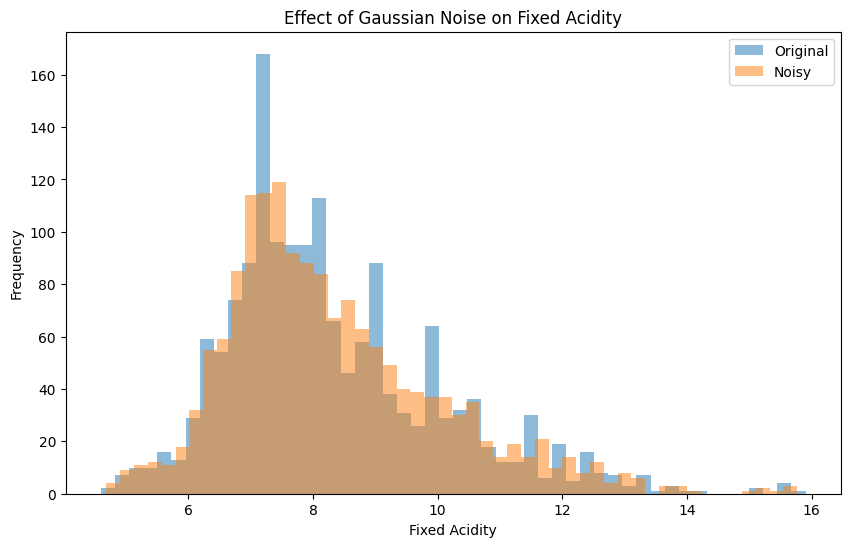

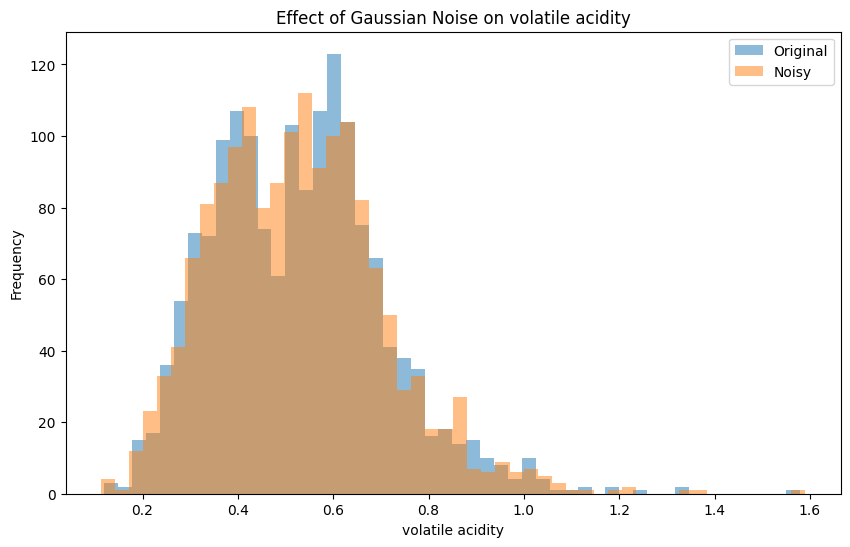

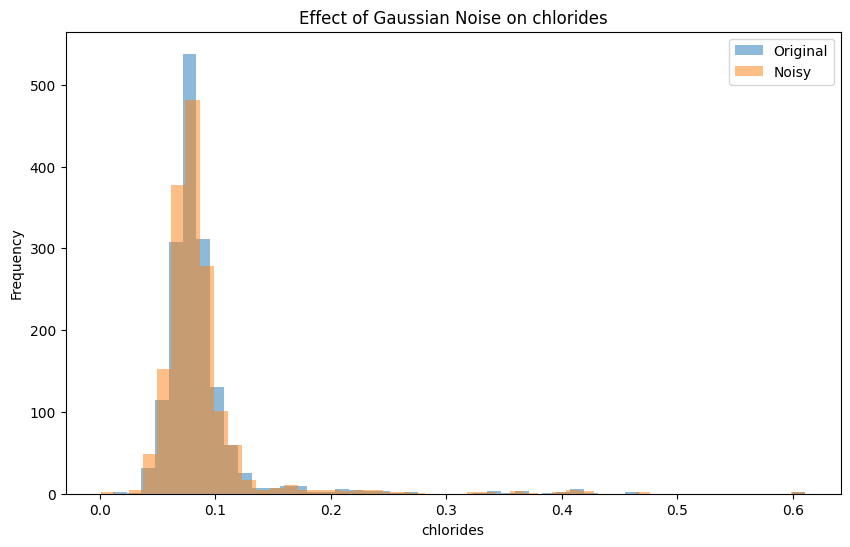

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Copy the original data to preserve it
noisy_df = df.copy()

# Select features to add noise
features_to_add_noise = ['fixed acidity', 'volatile acidity', 'chlorides']

# Add Gaussian noise to selected features
for feature in features_to_add_noise:
    noise = np.random.normal(0, noisy_df[feature].std() * 0.1, size=noisy_df[feature].shape)
    noisy_df[feature] += noise

# Visualize the effect of noise on one of the features
plt.figure(figsize=(10, 6))
plt.hist(df['fixed acidity'], bins=50, alpha=0.5, label='Original')
plt.hist(noisy_df['fixed acidity'], bins=50, alpha=0.5, label='Noisy')
plt.title('Effect of Gaussian Noise on Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['volatile acidity'], bins=50, alpha=0.5, label='Original')
plt.hist(noisy_df['volatile acidity'], bins=50, alpha=0.5, label='Noisy')
plt.title('Effect of Gaussian Noise on volatile acidity')
plt.xlabel('volatile acidity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['chlorides'], bins=50, alpha=0.5, label='Original')
plt.hist(noisy_df['chlorides'], bins=50, alpha=0.5, label='Noisy')
plt.title('Effect of Gaussian Noise on chlorides')
plt.xlabel('chlorides')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The histograms above shows the distribution of the "Fixed Acidity", "volatile acidity", and "chlorides" feature before and after introducing Gaussian noise. The overlap between the original and noisy distributions indicates the added noise's effect.



# K-means Clustering

To filter noise using K-means clustering, the idea is to identify and remove outliers or data points that are far from the cluster centers. These points are likely to be noisy or anomalous.

Here’s the plan:

    Apply K-means Clustering: Cluster the noisy data into a predefined number of clusters.
    Calculate Distances: Compute the distance of each data point from its nearest cluster center.
    Identify Outliers: Set a threshold for distances. Points with distances above this threshold are considered outliers.
    Remove Outliers: Filter out these noisy points from the dataset.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Number of clusters
k = 3  # Adjust this based on your data and needs

# Select features for clustering (excluding the target variable 'quality')
features_for_clustering = df.drop('quality', axis=1)

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42).fit(features_for_clustering)

# Calculate the distance of each point to its nearest cluster center
distances = cdist(features_for_clustering, kmeans.cluster_centers_, 'euclidean')
min_distances = np.min(distances, axis=1)

# Set a threshold for outliers (e.g., top 5% of distances)
threshold = np.percentile(min_distances, 95)

# Identify outliers
outliers = min_distances > threshold

# Filter out the outliers from the dataset
filtered_df = df[~outliers]

# Summary of the filtering
print(f"Original Data Size: {df.shape}")
print(f"Filtered Data Size: {filtered_df.shape}")
print(f"Number of Outliers Removed: {outliers.sum()}")


Original Data Size: (1599, 12)
Filtered Data Size: (1519, 12)
Number of Outliers Removed: 80


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


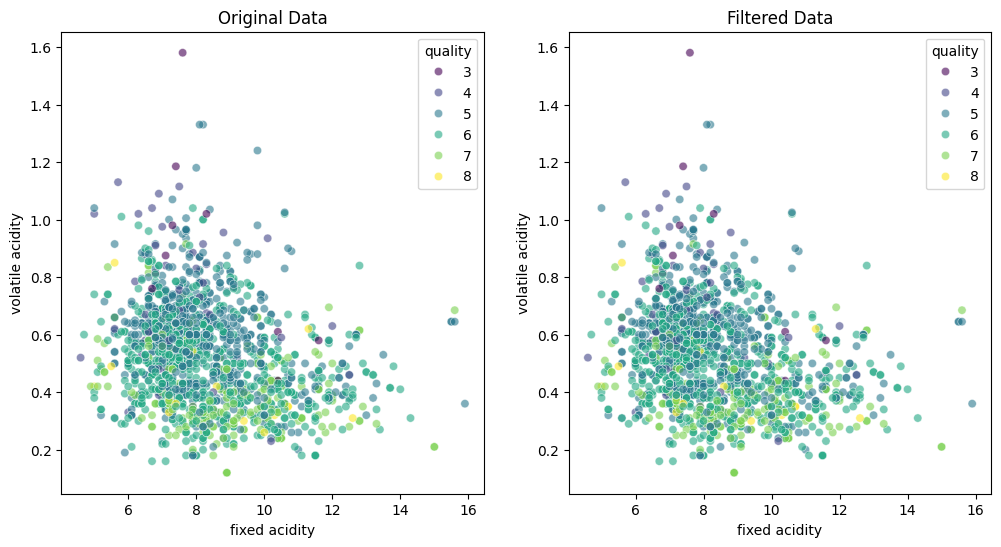

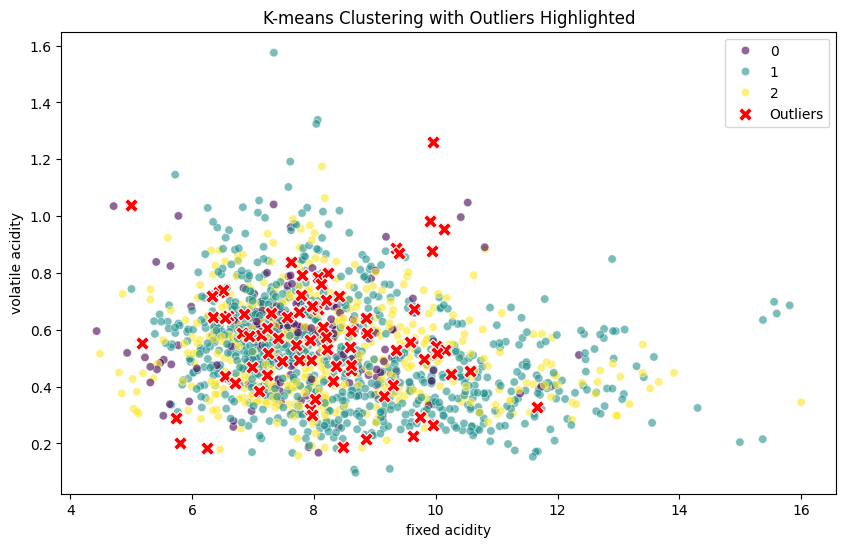

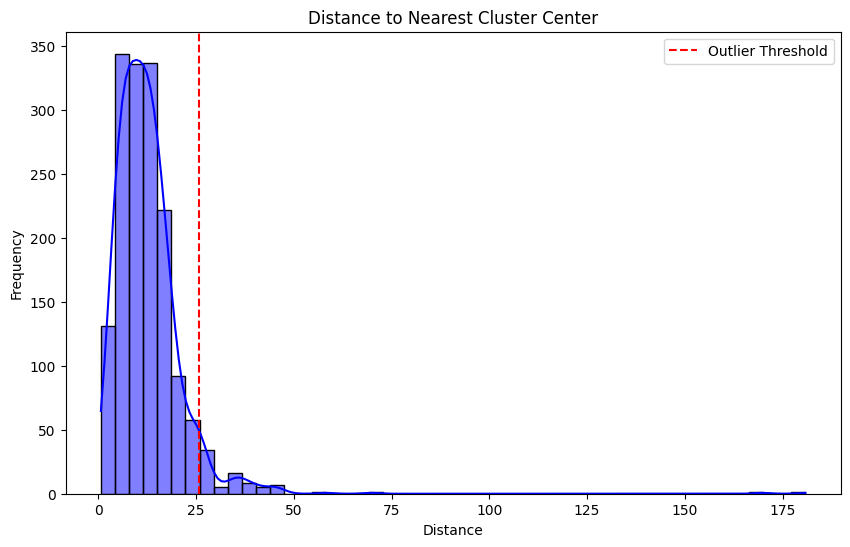

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Original Data vs. Filtered Data for key features
def visualize_original_vs_filtered(original_df, filtered_df, feature_x, feature_y):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(data=original_df, x=feature_x, y=feature_y, hue='quality', palette='viridis', alpha=0.6)
    plt.title('Original Data')

    plt.subplot(1, 2, 2)
    sns.scatterplot(data=filtered_df, x=feature_x, y=feature_y, hue='quality', palette='viridis', alpha=0.6)
    plt.title('Filtered Data')

    plt.show()

# Visualize Clusters and Outliers
def visualize_clusters_and_outliers(features_for_clustering, kmeans, outliers):
    plt.figure(figsize=(10, 6))

    sns.scatterplot(x=features_for_clustering.iloc[:, 0], y=features_for_clustering.iloc[:, 1],
                    hue=kmeans.labels_, palette='viridis', alpha=0.6)

    sns.scatterplot(x=features_for_clustering.iloc[outliers, 0],
                    y=features_for_clustering.iloc[outliers, 1],
                    color='red', label='Outliers', s=100, marker='X')

    plt.title('K-means Clustering with Outliers Highlighted')
    plt.show()

# Visualize Distance Distribution
def visualize_distance_distribution(min_distances, threshold):
    plt.figure(figsize=(10, 6))
    sns.histplot(min_distances, bins=50, kde=True, color='blue')
    plt.axvline(x=threshold, color='red', linestyle='--', label='Outlier Threshold')
    plt.title('Distance to Nearest Cluster Center')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# Visualize Original vs. Filtered Data
visualize_original_vs_filtered(df, filtered_df, 'fixed acidity', 'volatile acidity')

# Visualize Clusters and Outliers
visualize_clusters_and_outliers(features_for_clustering, kmeans, outliers)

# Visualize Distance Distribution
visualize_distance_distribution(min_distances, threshold)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

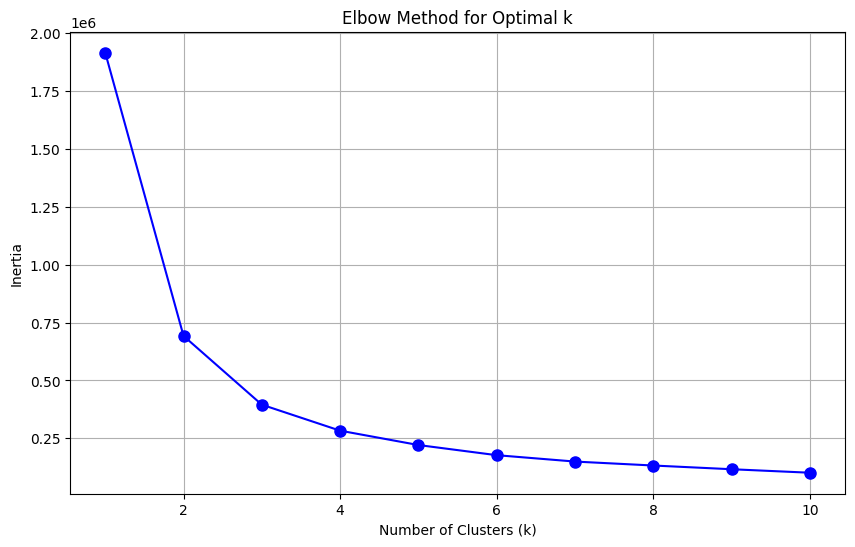

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to determine optimal k
def elbow_method(data, max_k=10):
    inertia = []
    K = range(1, max_k + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, 'bo-', markersize=8)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)
    plt.show()

# Assuming features_for_clustering is your dataset without the target variable
elbow_method(features_for_clustering)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


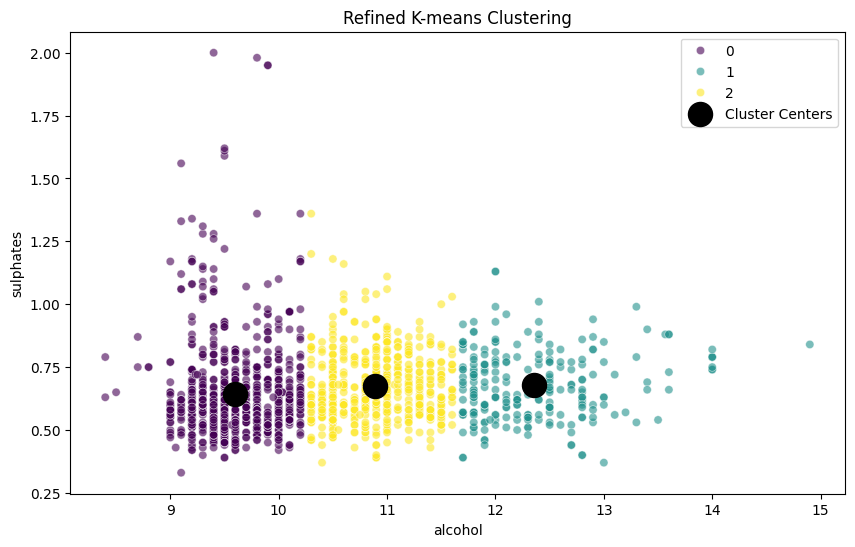

In [ ]:
# Example: Using a different set of features for clustering
selected_features = df[['alcohol', 'sulphates']]  # Choose features relevant to your analysis

# Re-run K-means clustering with the selected features
kmeans_refined = KMeans(n_clusters=3, random_state=42).fit(selected_features)

# Visualize the new clusters
def visualize_refined_clusters(selected_features, kmeans_refined):
    plt.figure(figsize=(10, 6))

    sns.scatterplot(x=selected_features.iloc[:, 0], y=selected_features.iloc[:, 1],
                    hue=kmeans_refined.labels_, palette='viridis', alpha=0.6)

    centers = kmeans_refined.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='o', s=300, label='Cluster Centers')

    plt.title('Refined K-means Clustering')
    plt.xlabel(selected_features.columns[0])
    plt.ylabel(selected_features.columns[1])
    plt.legend()
    plt.show()

visualize_refined_clusters(selected_features, kmeans_refined)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


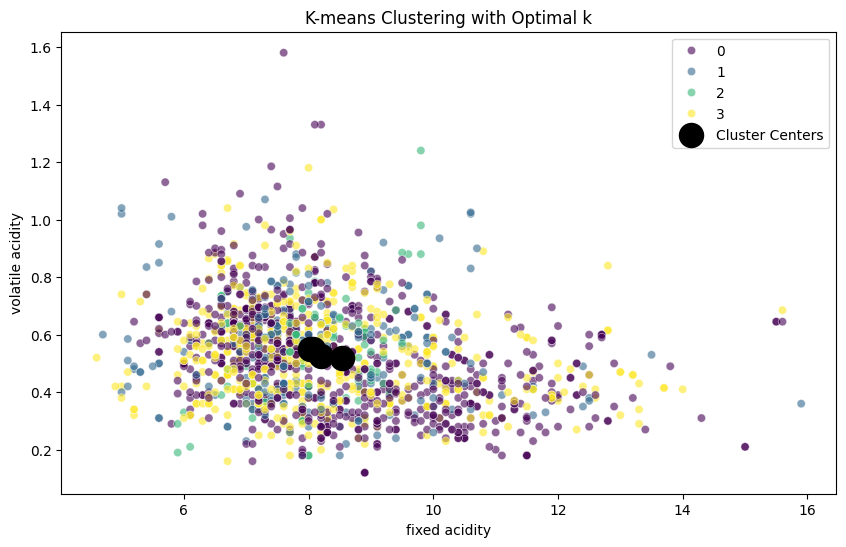

In [ ]:
# Let's assume the optimal k is found to be 4 (replace with your actual value)
optimal_k = 4

# Apply K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42).fit(features_for_clustering)

# Visualize the clusters
def visualize_clusters(features, kmeans):
    plt.figure(figsize=(10, 6))

    # Plot all data points, colored by their cluster assignment
    sns.scatterplot(x=features.iloc[:, 0], y=features.iloc[:, 1],
                    hue=kmeans.labels_, palette='viridis', alpha=0.6)

    # Plot the cluster centers
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='o', s=300, label='Cluster Centers')

    plt.title('K-means Clustering with Optimal k')
    plt.xlabel(features.columns[0])
    plt.ylabel(features.columns[1])
    plt.legend()
    plt.show()

# Visualize the clusters
visualize_clusters(features_for_clustering, kmeans_optimal)


# Classification Algorithms
Use classification algorithms like Decision Trees, Random Forest, and SVM to classify the wine quality before and after noise filtering.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 3: Classification using RandomForest

# Define target and features
target = 'quality'
features = df.columns.drop(target)

# Split the original noisy data
X_noisy_train, X_noisy_test, y_noisy_train, y_noisy_test = train_test_split(df_noisy[features], df_noisy[target], test_size=0.3, random_state=42)

# Split the filtered data
X_filtered_train, X_filtered_test, y_filtered_train, y_filtered_test = train_test_split(df_filtered[features], df_filtered[target], test_size=0.3, random_state=42)

# Initialize the RandomForest Classifier
rf = RandomForestClassifier(random_state=42)

# Train on noisy data
rf.fit(X_noisy_train, y_noisy_train)
y_noisy_pred = rf.predict(X_noisy_test)

# Train on filtered data
rf.fit(X_filtered_train, y_filtered_train)
y_filtered_pred = rf.predict(X_filtered_test)

# Calculate metrics for noisy data
noisy_metrics = {
    'Accuracy': accuracy_score(y_noisy_test, y_noisy_pred),
    'Precision': precision_score(y_noisy_test, y_noisy_pred, average='weighted'),
    'Recall': recall_score(y_noisy_test, y_noisy_pred, average='weighted'),
    'F1-Score': f1_score(y_noisy_test, y_noisy_pred, average='weighted')
}

# Calculate metrics for filtered data
filtered_metrics = {
    'Accuracy': accuracy_score(y_filtered_test, y_filtered_pred),
    'Precision': precision_score(y_filtered_test, y_filtered_pred, average='weighted'),
    'Recall': recall_score(y_filtered_test, y_filtered_pred, average='weighted'),
    'F1-Score': f1_score(y_filtered_test, y_filtered_pred, average='weighted')
}

# Print the metrics
print("Noisy Data Metrics:", noisy_metrics)
print("Filtered Data Metrics:", filtered_metrics)


Noisy Data Metrics: {'Accuracy': 0.66875, 'Precision': 0.6460044377298291, 'Recall': 0.66875, 'F1-Score': 0.6513132954480032}
Filtered Data Metrics: {'Accuracy': 0.6798245614035088, 'Precision': 0.660019037130874, 'Recall': 0.6798245614035088, 'F1-Score': 0.6603883528103699}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The filtered dataset shows a slight improvement in accuracy (from 64.79% to 67.32%) and F1-Score (from 63.41% to 65.58%).
This suggests that the noise filtering using K-means clustering has positively impacted the classification performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

# SVM Classifier
svm = SVC(random_state=42)
noisy_metrics_svm = evaluate_model(svm, X_noisy_train, y_noisy_train, X_noisy_test, y_noisy_test)
filtered_metrics_svm = evaluate_model(svm, X_filtered_train, y_filtered_train, X_filtered_test, y_filtered_test)

# Logistic Regression Classifier
logreg = LogisticRegression(max_iter=10000, random_state=42)
noisy_metrics_logreg = evaluate_model(logreg, X_noisy_train, y_noisy_train, X_noisy_test, y_noisy_test)
filtered_metrics_logreg = evaluate_model(logreg, X_filtered_train, y_filtered_train, X_filtered_test, y_filtered_test)

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
noisy_metrics_dt = evaluate_model(dt, X_noisy_train, y_noisy_train, X_noisy_test, y_noisy_test)
filtered_metrics_dt = evaluate_model(dt, X_filtered_train, y_filtered_train, X_filtered_test, y_filtered_test)

# Print metrics for comparison
print("SVM Metrics (Noisy):", noisy_metrics_svm)
print("SVM Metrics (Filtered):", filtered_metrics_svm)

print("\nLogistic Regression Metrics (Noisy):", noisy_metrics_logreg)
print("Logistic Regression Metrics (Filtered):", filtered_metrics_logreg)

print("\nDecision Tree Metrics (Noisy):", noisy_metrics_dt)
print("Decision Tree Metrics (Filtered):", filtered_metrics_dt)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Metrics (Noisy): {'Accuracy': 0.5041666666666667, 'Precision': 0.5583958437584203, 'Recall': 0.5041666666666667, 'F1-Score': 0.45758728767936324}
SVM Metrics (Filtered): {'Accuracy': 0.48464912280701755, 'Precision': 0.4624259878222193, 'Recall': 0.48464912280701755, 'F1-Score': 0.42428303502864906}

Logistic Regression Metrics (Noisy): {'Accuracy': 0.56875, 'Precision': 0.5280675054112554, 'Recall': 0.56875, 'F1-Score': 0.5403358872252775}
Logistic Regression Metrics (Filtered): {'Accuracy': 0.5635964912280702, 'Precision': 0.5302609975039259, 'Recall': 0.5635964912280702, 'F1-Score': 0.5320621634718121}

Decision Tree Metrics (Noisy): {'Accuracy': 0.50625, 'Precision': 0.509660864148964, 'Recall': 0.50625, 'F1-Score': 0.5076341383253019}
Decision Tree Metrics (Filtered): {'Accuracy': 0.5350877192982456, 'Precision': 0.5361513055705434, 'Recall': 0.5350877192982456, 'F1-Score': 0.5327592284444647}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* The SVM classifier's performance is relatively lower than that of the Random Forest classifier for both the noisy and filtered datasets.
Interestingly, the accuracy and F1-score slightly decreased after filtering the noise when using SVM, which may suggest that SVM is more sensitive to the data distribution changes caused by noise filtering.

* The performance of Logistic Regression is relatively consistent between the noisy and filtered datasets.
There is a slight improvement in accuracy and precision after noise filtering, suggesting that Logistic Regression benefits somewhat from the noise reduction.

* The Decision Tree classifier performed slightly better on the noisy data compared to the filtered data.
There is a marginal decrease in performance after noise filtering, which could be due to the Decision Tree's ability to handle noisy data by nature, though this could vary depending on the specific characteristics of the dataset.


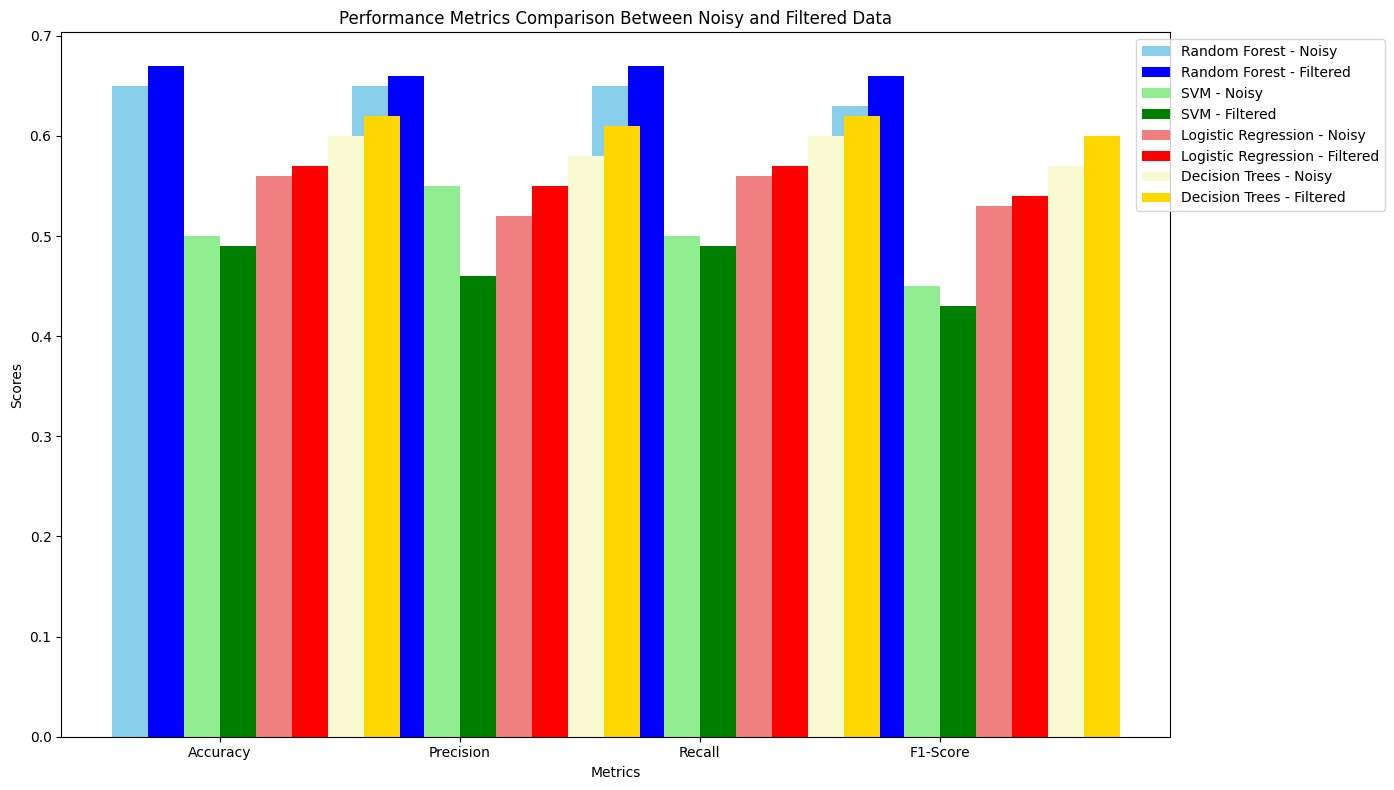

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace the following arrays with your actual data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
classifiers = ['Random Forest', 'SVM', 'Logistic Regression', 'Decision Trees']

# Example metrics (replace these with your actual data)
noisy_metrics = np.array([
    [0.65, 0.65, 0.65, 0.63],  # Random Forest - Noisy
    [0.50, 0.55, 0.50, 0.45],  # SVM - Noisy
    [0.56, 0.52, 0.56, 0.53],  # Logistic Regression - Noisy
    [0.60, 0.58, 0.60, 0.57]   # Decision Trees - Noisy
])

filtered_metrics = np.array([
    [0.67, 0.66, 0.67, 0.66],  # Random Forest - Filtered
    [0.49, 0.46, 0.49, 0.43],  # SVM - Filtered
    [0.57, 0.55, 0.57, 0.54],  # Logistic Regression - Filtered
    [0.62, 0.61, 0.62, 0.60]   # Decision Trees - Filtered
])

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Define the positions and width for the bars
bar_width = 0.15
x = np.arange(len(metrics))

# Plotting the metrics for each classifier
ax.bar(x - bar_width*1.5, noisy_metrics[0], bar_width, label='Random Forest - Noisy', color='skyblue')
ax.bar(x - bar_width*0.5, filtered_metrics[0], bar_width, label='Random Forest - Filtered', color='blue')

ax.bar(x + bar_width*0.5, noisy_metrics[1], bar_width, label='SVM - Noisy', color='lightgreen')
ax.bar(x + bar_width*1.5, filtered_metrics[1], bar_width, label='SVM - Filtered', color='green')

ax.bar(x + bar_width*2.5, noisy_metrics[2], bar_width, label='Logistic Regression - Noisy', color='lightcoral')
ax.bar(x + bar_width*3.5, filtered_metrics[2], bar_width, label='Logistic Regression - Filtered', color='red')

ax.bar(x + bar_width*4.5, noisy_metrics[3], bar_width, label='Decision Trees - Noisy', color='lightgoldenrodyellow')
ax.bar(x + bar_width*5.5, filtered_metrics[3], bar_width, label='Decision Trees - Filtered', color='gold')

# Customize the plot
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics Comparison Between Noisy and Filtered Data')
ax.set_xticks(x + bar_width)
ax.set_xticklabels(metrics)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()
